<a href="https://colab.research.google.com/github/selinsensoy/DSA210-PROJECT/blob/main/Applying_ML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Model Evaluation for Fuel Consumption:
RMSE: 544.43 kg
MAE: 442.01 kg
R²: 0.0096


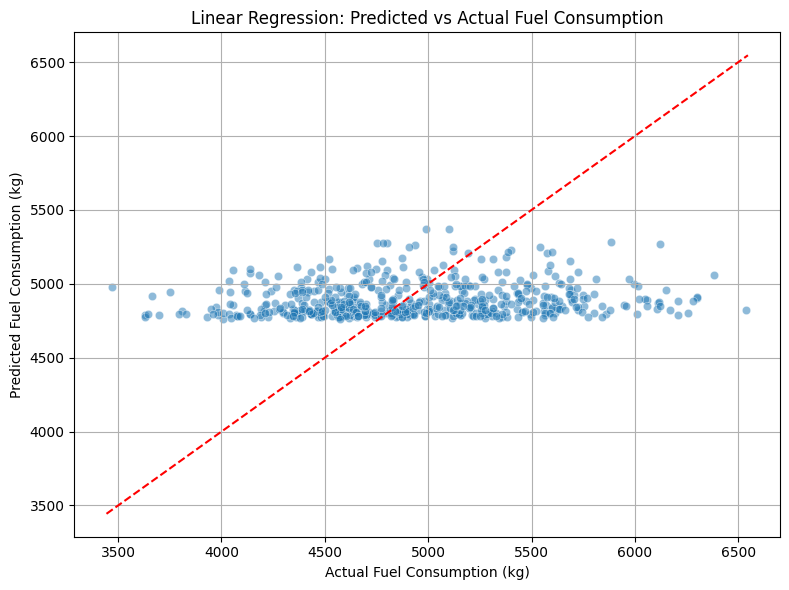

In [10]:
#Linear Regression Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
merged = pd.read_csv("fuel_wind_merged.csv")
merged = merged.dropna(subset=['fuel_consumption_kg', 'wind_speed'])

# 2. Define features and target
X = merged[['wind_speed']]
y = merged['fuel_consumption_kg']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation for Fuel Consumption:")
print(f"RMSE: {rmse:.2f} kg")
print(f"MAE: {mae:.2f} kg")
print(f"R²: {r2:.4f}")

# 6. Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Fuel Consumption (kg)")
plt.ylabel("Predicted Fuel Consumption (kg)")
plt.title("Linear Regression: Predicted vs Actual Fuel Consumption")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest Regression Model Evaluation for Fuel Consumption:
RMSE: 471.01 kg
MAE: 370.16 kg
R²: 0.2587


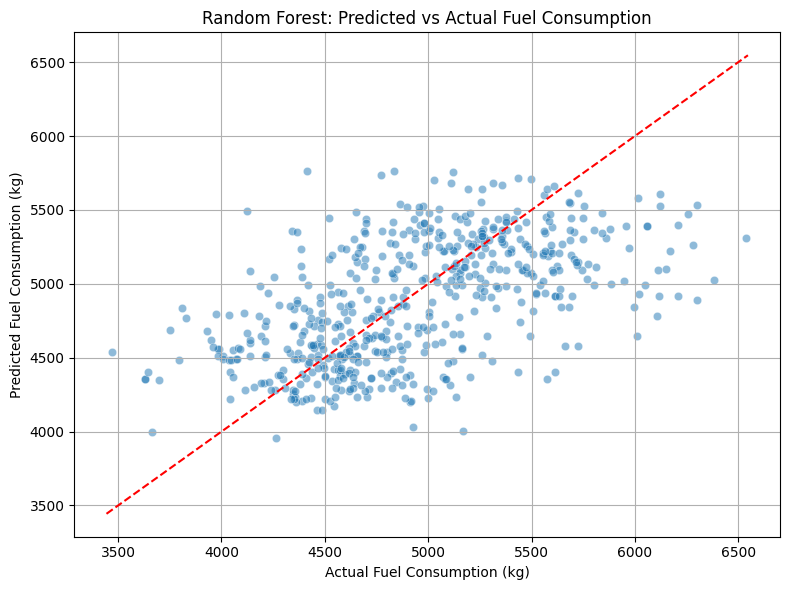

In [11]:
#Random Forest Regression Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
merged = pd.read_csv("fuel_wind_merged.csv", low_memory=False)

# Clean the data: drop rows with missing wind_speed or fuel_consumption_kg
df = merged.dropna(subset=['wind_speed', 'fuel_consumption_kg']).copy()

# Features and target
X = df[['wind_speed']]
y = df['fuel_consumption_kg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Model Evaluation for Fuel Consumption:")
print(f"RMSE: {rmse:.2f} kg")
print(f"MAE: {mae:.2f} kg")
print(f"R²: {r2:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Fuel Consumption (kg)")
plt.ylabel("Predicted Fuel Consumption (kg)")
plt.title("Random Forest: Predicted vs Actual Fuel Consumption")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()
